In [1]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.stats as stats 
import seaborn as sns
# import tushare as ts
import statsmodels.api as sm
from sklearn import linear_model

df = pd.read_csv('matches_cleaned.csv')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7053 entries, 0 to 7052
Data columns (total 58 columns):
Unnamed: 0          7053 non-null int64
League              7053 non-null object
Year                7053 non-null int64
Season              7053 non-null object
Type                7053 non-null object
blueTeamTag         7053 non-null object
bResult             7053 non-null int64
rResult             7053 non-null int64
redTeamTag          7053 non-null object
gamelength          7053 non-null int64
golddiff            7053 non-null object
goldblue            7053 non-null object
bKills              7053 non-null object
bTowers             7053 non-null object
bInhibs             7053 non-null object
bDragons            7053 non-null object
bBarons             7053 non-null object
bHeralds            7053 non-null object
goldred             7053 non-null object
rKills              7053 non-null object
rTowers             7053 non-null object
rInhibs             7053 non-null obj

In [3]:
df.describe()

,Unnamed: 0,Year,bResult,rResult,gamelength
count,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000
mean,3526.000000,2016.236779,0.544733,0.455267,36.937615
std,2036.170057,0.796207,0.498030,0.498030,7.923347
min,0.000000,2014.000000,0.000000,0.000000,17.000000
25%,1763.000000,2016.000000,0.000000,0.000000,31.000000
50%,3526.000000,2016.000000,1.000000,0.000000,36.000000
75%,5289.000000,2017.000000,1.000000,1.000000,41.000000
max,7052.000000,2017.000000,1.000000,1.000000,81.000000


### multivariate linear model

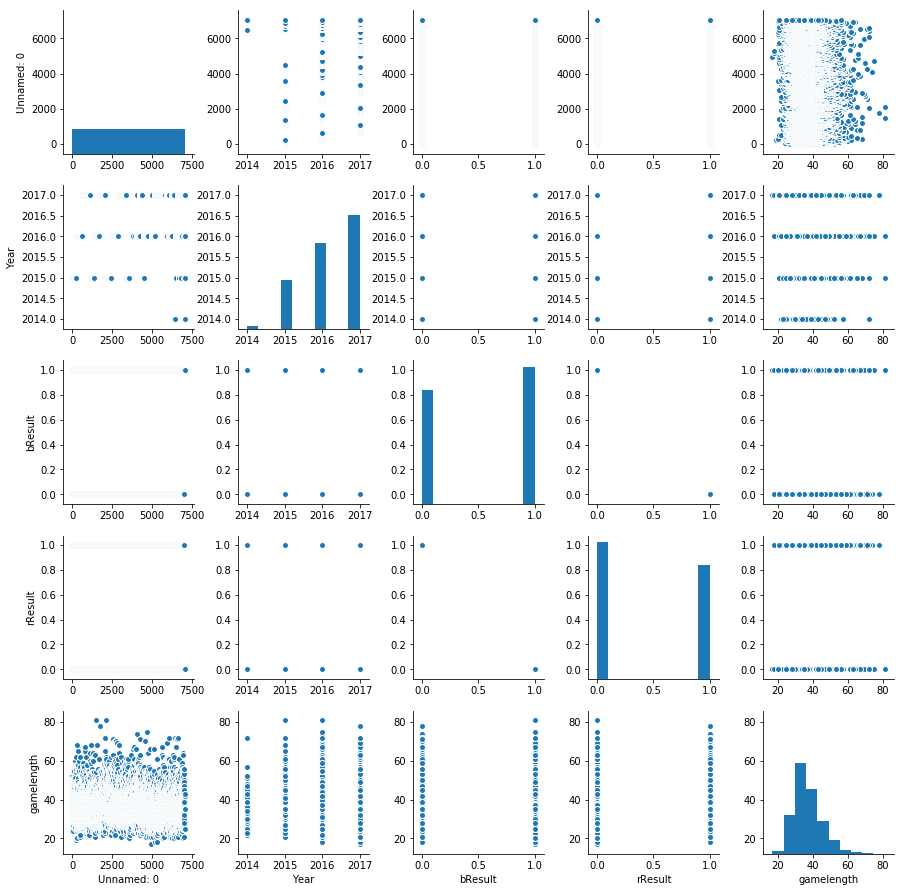

In [4]:
sns.pairplot(df)
plt.rcParams['figure.figsize'] = (10,6)

### 1, Win rates of teams in blue area and read area

In [5]:
df["bResult"].value_counts()

1    3842
0    3211
Name: bResult, dtype: int64

In [6]:
df["rResult"].value_counts()

0    3842
1    3211
Name: rResult, dtype: int64

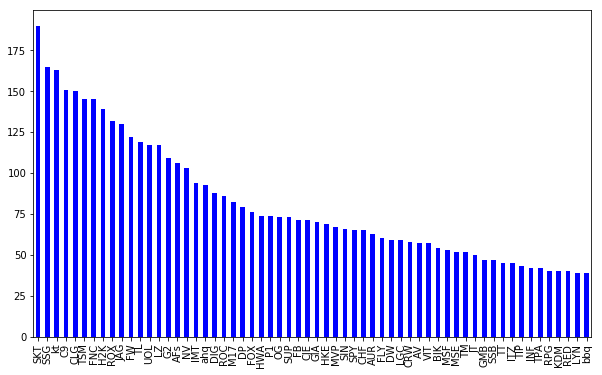

In [7]:
# Overall, team in blue area will have a higher win rate.
# How many times that each teams in blue area in each Champion are
bTeams = df['blueTeamTag']
bTeams_count = bTeams.value_counts()
bTeams_count[:60].plot(kind = 'bar',color='b')
plt.figure(figsize=(300,100)) 

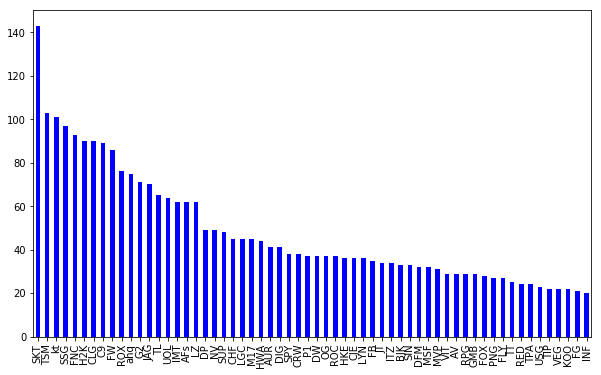

In [8]:
# filter win matches in blue area
bWin = df[df.bResult>0]
bTeamsWin = bWin['blueTeamTag']
bTeamsWin_count = bTeamsWin.value_counts()
bTeamsWin_count[:60].plot(kind = 'bar',color='b')
plt.figure(figsize=(300,100)) 

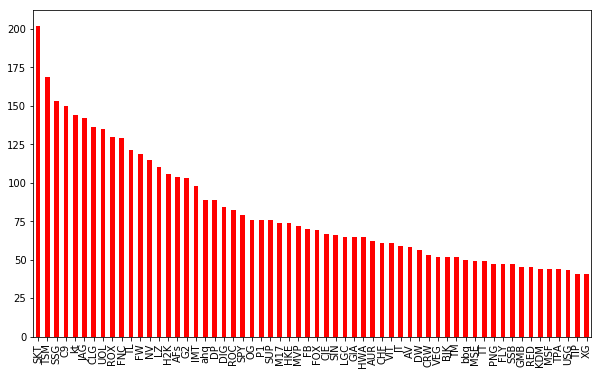

In [9]:
rTeams = df['redTeamTag']
rTeams_count = rTeams.value_counts()
rTeams_count[:60].plot(kind = 'bar',color='r')
plt.figure(figsize=(300,100)) 

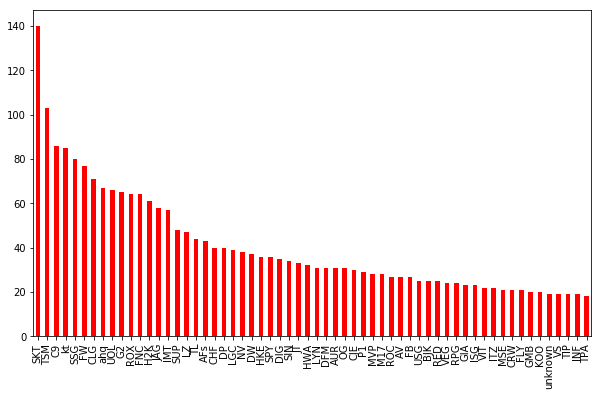

In [10]:
# filter win matches in red area
rWin = df[df.rResult>0]
rTeamsWin = rWin['redTeamTag']
rTeamsWin_count = rTeamsWin.value_counts()
rTeamsWin_count[:60].plot(kind = 'bar',color='r')
plt.figure(figsize=(300,100)) 

### Does champion have effects on win rate

### Top

Text(0,0.5,'picked times')

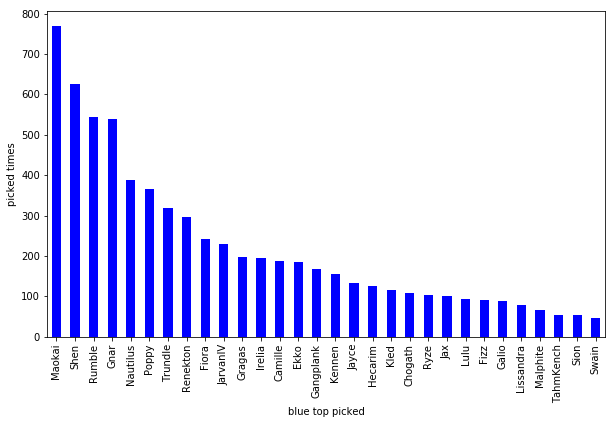

In [11]:
blueTopChamp = df['blueTopChamp']
blueTopChamp_count = blueTopChamp.value_counts()
blueTopChamp_count[:30].plot(kind = 'bar',color='b',label='blueTop')
plt.style.use('ggplot')
plt.xlabel("blue top picked")
plt.ylabel("picked times")
# plt.figure(figsize=(300,100))

Text(0,0.5,'picked times')

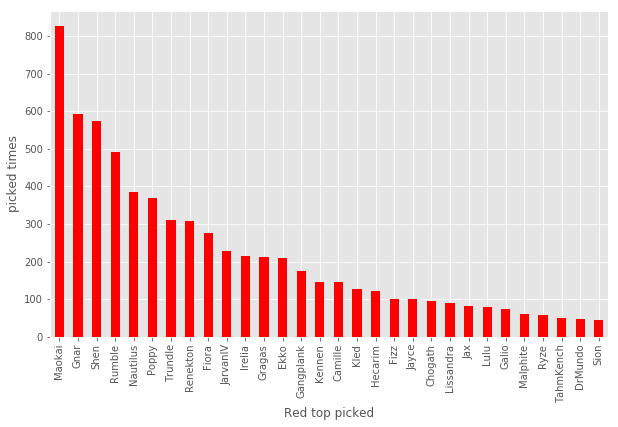

In [12]:
redTopChamp = df['redTopChamp']
redTopChamp_count = redTopChamp.value_counts()
redTopChamp_count[:30].plot(kind = 'bar',color='r',label='redTop')
plt.style.use('ggplot')
plt.xlabel("Red top picked")
plt.ylabel("picked times")

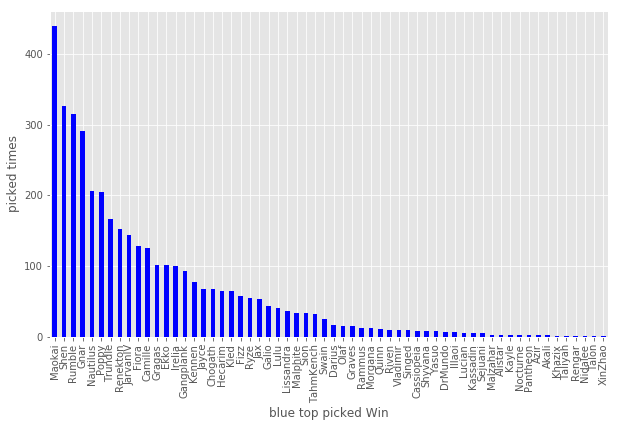

In [13]:
blueTopChampWin = bWin['blueTopChamp']
blueTopChampWin_count = blueTopChampWin.value_counts()
blueTopChampWin_count[:60].plot(kind = 'bar',color='b')

plt.style.use('ggplot')
plt.xlabel("blue top picked Win")
plt.ylabel("picked times")
plt.figure(figsize=(300,100))

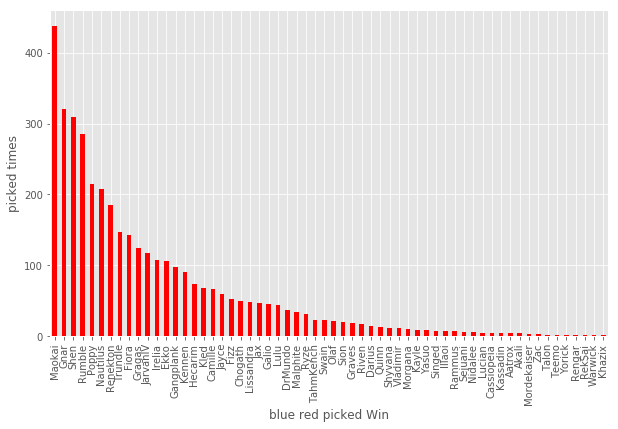

In [14]:
redTopChampWin = bWin['redTopChamp']
redTopChampWin_count = redTopChampWin.value_counts()
redTopChampWin_count[:60].plot(kind = 'bar',color='r')

plt.style.use('ggplot')
plt.xlabel("blue red picked Win")
plt.ylabel("picked times")
plt.figure(figsize=(300,100))

In [15]:
# Just choose top4 picked top

MaokaiWinRates = blueTopChampWin[blueTopChampWin == 'Maokai'].value_counts()/blueTopChamp[blueTopChamp == 'Maokai'].value_counts()
ShenWinRates = blueTopChampWin[blueTopChampWin == 'Shen'].value_counts()/blueTopChamp[blueTopChamp == 'Shen'].value_counts()
RumbleWinRates = blueTopChampWin[blueTopChampWin == 'Rumble'].value_counts()/blueTopChamp[blueTopChamp == 'Rumble'].value_counts()
GnarWinRates = blueTopChampWin[blueTopChampWin == 'Gnar'].value_counts()/blueTopChamp[blueTopChamp == 'Gnar'].value_counts()

In [16]:
rMaokaiWinRates = redTopChampWin[redTopChampWin == 'Maokai'].value_counts()/redTopChamp[redTopChamp == 'Maokai'].value_counts()
rShenWinRates = redTopChampWin[redTopChampWin == 'Shen'].value_counts()/redTopChamp[redTopChamp == 'Shen'].value_counts()
rRumbleWinRates = redTopChampWin[redTopChampWin == 'Rumble'].value_counts()/redTopChamp[redTopChamp == 'Rumble'].value_counts()
rGnarWinRates = redTopChampWin[redTopChampWin == 'Gnar'].value_counts()/redTopChamp[redTopChamp == 'Gnar'].value_counts()

In [17]:
bTopWinRate = [MaokaiWinRates, ShenWinRates, RumbleWinRates, GnarWinRates]
bTopWinRate

[Maokai    0.570871
 Name: blueTopChamp, dtype: float64, Shen    0.519936
 Name: blueTopChamp, dtype: float64, Rumble    0.579044
 Name: blueTopChamp, dtype: float64, Gnar    0.540892
 Name: blueTopChamp, dtype: float64]

In [18]:
rTopWinRate = [rMaokaiWinRates, rShenWinRates, rRumbleWinRates, rGnarWinRates]
rTopWinRate

[Maokai    0.530266
 Name: redTopChamp, dtype: float64, Shen    0.538328
 Name: redTopChamp, dtype: float64, Rumble    0.579268
 Name: redTopChamp, dtype: float64, Gnar    0.539629
 Name: redTopChamp, dtype: float64]

In [19]:
# count = 4
# bar_width = 0.35
# index = 0.2
# # label = ['Maokai','Shen','Rumble','Gnar']
# bTopWinRate = (0.570871, 0.519936, 0.579044, 0.540892)
# rTopWinRate = (0.530266, 0.538328, 0.579268, 0.539629)
# rects1 = plt.bar(index, bTopWinRate, bar_width, color='b',label='Blue')
# rects2 = plt.bar(index + bar_width, rTopWinRate, bar_width, color='r',label='Red')
# plt.xticks(index + bar_width, ('Maokai','Shen','Rumble','Gnar'))
# plt.xlabel('Win Rates')
# plt.ylabel('Top Champions')
# plt.show()

### MIDDLE

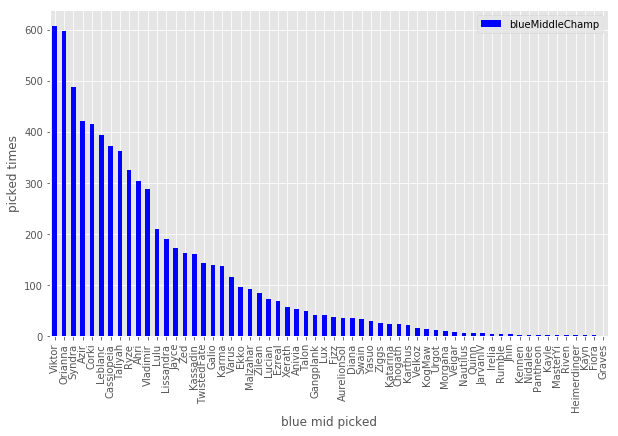

In [20]:
blueMidChamp = df['blueMiddleChamp']
blueMidChamp_count = blueMidChamp.value_counts()
blueMidChamp_count[:60].plot(kind = 'bar',color='b')
plt.style.use('ggplot')
plt.xlabel("blue mid picked")
plt.ylabel("picked times")
plt.legend()
plt.figure(figsize=(300,100))

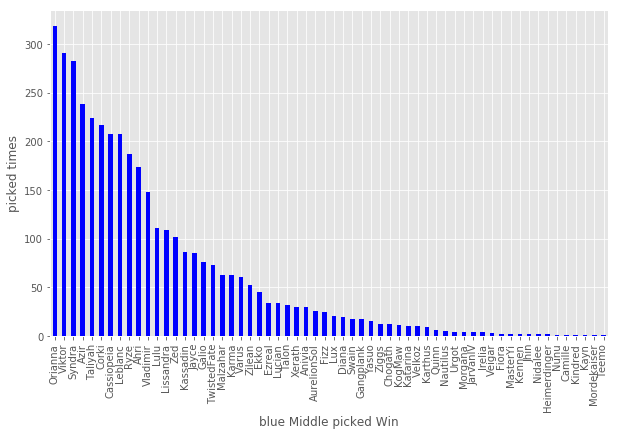

In [21]:
blueMidChampWin = bWin['blueMiddleChamp']
blueMidChampWin_count = blueMidChampWin.value_counts()
blueMidChampWin_count[:60].plot(kind = 'bar',color='b')
plt.style.use('ggplot')
plt.xlabel("blue Middle picked Win")
plt.ylabel("picked times")
plt.figure(figsize=(300,100))

In [30]:
# Just choose top4 picked top

OriWinRates = blueMidChampWin[blueMidChampWin == 'Orianna'].value_counts()/blueMidChamp[blueMidChamp == 'Orianna'].value_counts()
VikWinRates = blueMidChampWin[blueMidChampWin == 'Viktor'].value_counts()/blueMidChamp[blueMidChamp == 'Viktor'].value_counts()
SynWinRates = blueMidChampWin[blueMidChampWin == 'Syndra'].value_counts()/blueMidChamp[blueMidChamp == 'Syndra'].value_counts()
AzirWinRates = blueMidChampWin[blueMidChampWin == 'Azir'].value_counts()/blueMidChamp[blueMidChamp == 'Azir'].value_counts()

In [31]:
bMidWinRate = [OriWinRates, VikWinRates, SynWinRates, AzirWinRates]
bMidWinRate

[Orianna    0.534338
 Name: blueMiddleChamp, dtype: float64, Viktor    0.478618
 Name: blueMiddleChamp, dtype: float64, Syndra    0.579918
 Name: blueMiddleChamp, dtype: float64, Azir    0.563981
 Name: blueMiddleChamp, dtype: float64]

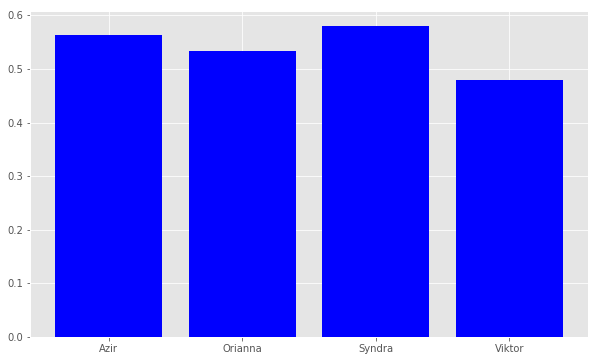

In [32]:
label = ['Orianna','Viktor','Syndra','Azir']
bMidWinRate = [0.534338, 0.478618, 0.579918, 0.563981]
plt.bar(x=label, height=bMidWinRate,color='b')
plt.show()

### Jungle

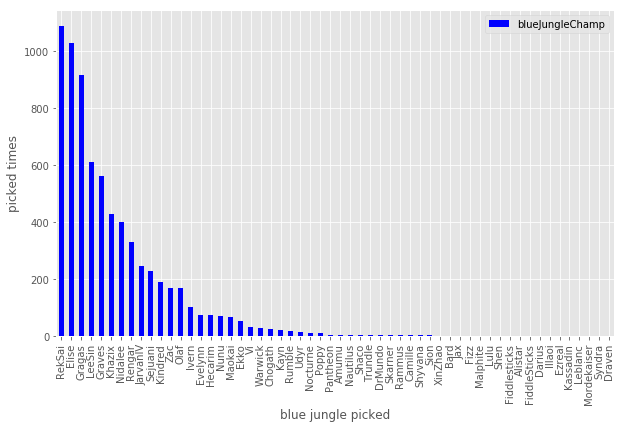

In [33]:
# blue
blueJugChamp = df['blueJungleChamp']
blueJugChamp_count = blueJugChamp.value_counts()
blueJugChamp_count[:60].plot(kind = 'bar',color='b')
plt.style.use('ggplot')
plt.xlabel("blue jungle picked")
plt.ylabel("picked times")
plt.legend()
plt.figure(figsize=(300,100))

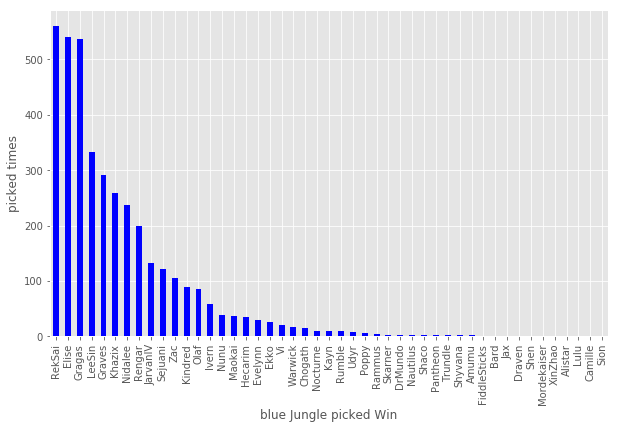

In [34]:
blueJugChampWin = bWin['blueJungleChamp']
blueJugChampWin_count = blueJugChampWin.value_counts()
blueJugChampWin_count[:60].plot(kind = 'bar',color='b')
plt.style.use('ggplot')
plt.xlabel("blue Jungle picked Win")
plt.ylabel("picked times")
plt.figure(figsize=(300,100))

In [35]:
RekWinRates = blueJugChampWin[blueJugChampWin == 'RekSai'].value_counts()/blueJugChamp[blueJugChamp == 'RekSai'].value_counts()
EliseWinRates = blueJugChampWin[blueJugChampWin == 'Elise'].value_counts()/blueJugChamp[blueJugChamp == 'Elise'].value_counts()
GragasWinRates = blueJugChampWin[blueJugChampWin == 'Gragas'].value_counts()/blueJugChamp[blueJugChamp == 'Gragas'].value_counts()
LeeSinWinRates = blueJugChampWin[blueJugChampWin == 'LeeSin'].value_counts()/blueJugChamp[blueJugChamp == 'LeeSin'].value_counts()

In [36]:
bJugWinRate = [RekWinRates, EliseWinRates, GragasWinRates, LeeSinWinRates]
bJugWinRate

[RekSai    0.515152
 Name: blueJungleChamp, dtype: float64, Elise    0.524781
 Name: blueJungleChamp, dtype: float64, Gragas    0.586245
 Name: blueJungleChamp, dtype: float64, LeeSin    0.542484
 Name: blueJungleChamp, dtype: float64]

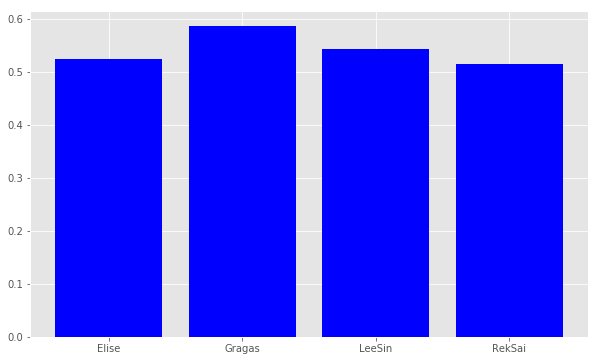

In [37]:
label = ['RekSai','Elise','Gragas','LeeSin']
bJugWinRate = [0.515152, 0.524781, 0.586245, 0.542484]
plt.bar(x=label, height=bJugWinRate,color='b')
plt.show()

### AD Carry

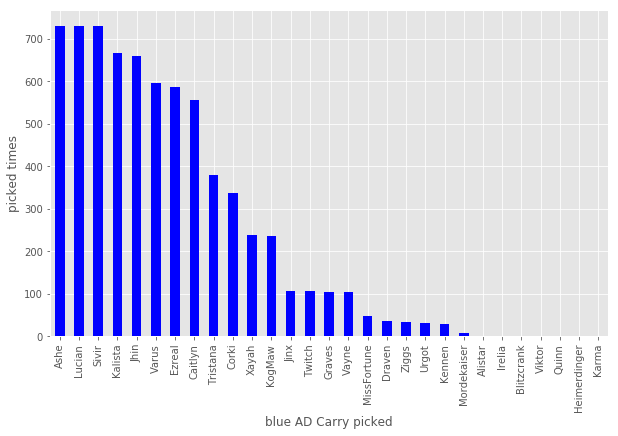

In [38]:
blueADCChamp = df['blueADCChamp']
blueADCChamp_count = blueADCChamp.value_counts()
blueADCChamp_count[:60].plot(kind = 'bar',color='b')
plt.style.use('ggplot')
plt.xlabel("blue AD Carry picked")
plt.ylabel("picked times")
plt.figure(figsize=(300,100))

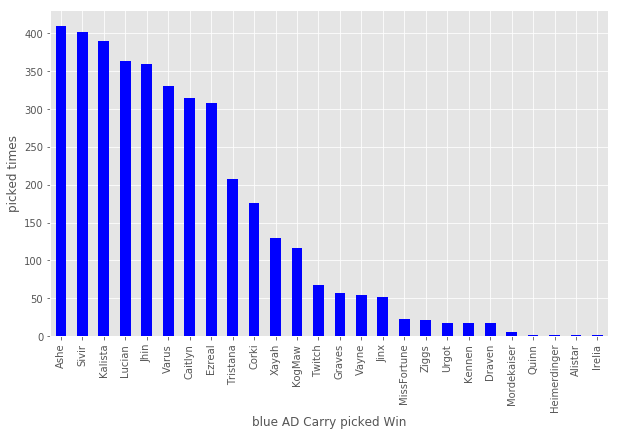

In [39]:
blueADCChampWin = bWin['blueADCChamp']
blueADCChampWin_count = blueADCChampWin.value_counts()
blueADCChampWin_count[:60].plot(kind = 'bar',color='b')
plt.style.use('ggplot')
plt.xlabel("blue AD Carry picked Win")
plt.ylabel("picked times")
plt.figure(figsize=(300,100))

In [40]:
AsheWinRates = blueADCChampWin[blueADCChampWin == 'Ashe'].value_counts()/blueADCChamp[blueADCChamp == 'Ashe'].value_counts()
SivirWinRates = blueADCChampWin[blueADCChampWin == 'Sivir'].value_counts()/blueADCChamp[blueADCChamp == 'Sivir'].value_counts()
KalistaWinRates = blueADCChampWin[blueADCChampWin == 'Kalista'].value_counts()/blueADCChamp[blueADCChamp == 'Kalista'].value_counts()
LucianWinRates = blueADCChampWin[blueADCChampWin == 'Lucian'].value_counts()/blueADCChamp[blueADCChamp == 'Lucian'].value_counts()

In [41]:
bADCWinRate = [AsheWinRates, SivirWinRates, KalistaWinRates, LucianWinRates]
bADCWinRate

[Ashe    0.560876
 Name: blueADCChamp, dtype: float64, Sivir    0.550069
 Name: blueADCChamp, dtype: float64, Kalista    0.584084
 Name: blueADCChamp, dtype: float64, Lucian    0.497942
 Name: blueADCChamp, dtype: float64]

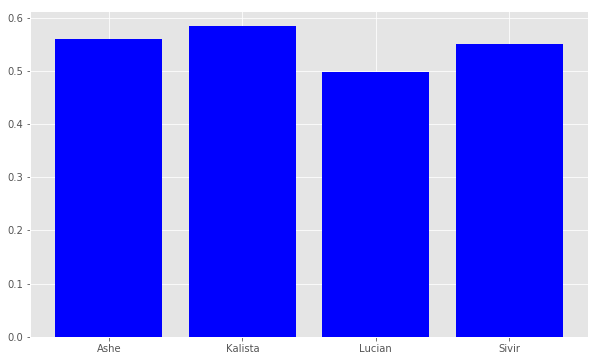

In [42]:
label = ['Ashe','Sivir','Kalista','Lucian']
bADCWinRate = [0.560876, 0.550069, 0.584084, 0.497942]
plt.bar(x=label, height=bADCWinRate,color='b')
plt.show()

### Support

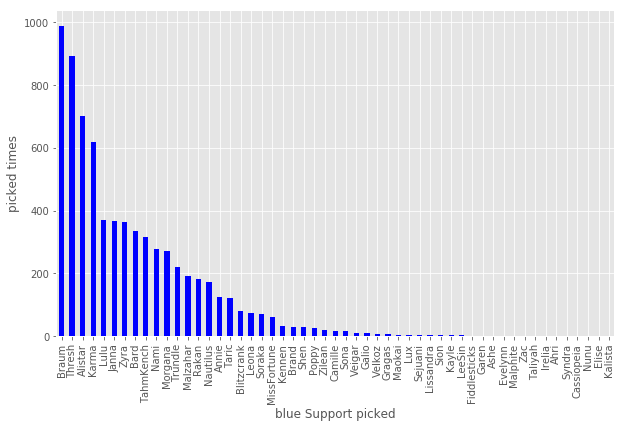

In [43]:
blueSupportChamp = df['blueSupportChamp']
blueSupportChamp_count = blueSupportChamp.value_counts()
blueSupportChamp_count[:60].plot(kind = 'bar',color='b')
plt.style.use('ggplot')
plt.xlabel("blue Support picked")
plt.ylabel("picked times")
plt.figure(figsize=(300,100))

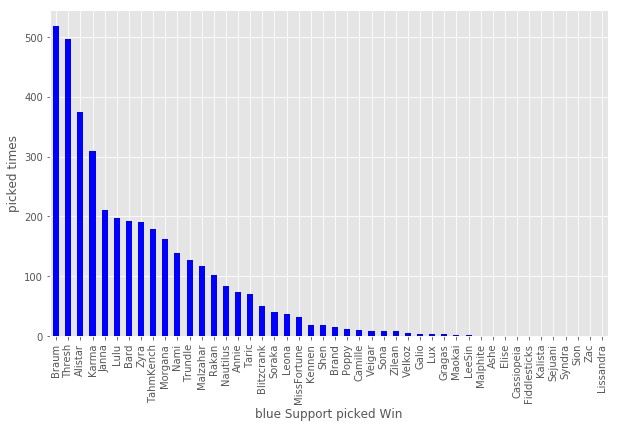

In [44]:
blueSupportChampWin = bWin['blueSupportChamp']
blueSupportChampWin_count = blueSupportChampWin.value_counts()
blueSupportChampWin_count[:60].plot(kind = 'bar',color='b')
plt.style.use('ggplot')
plt.xlabel("blue Support picked Win")
plt.ylabel("picked times")
plt.figure(figsize=(300,100))

In [45]:
BraumWinRates = blueSupportChampWin[blueSupportChampWin == 'Braum'].value_counts()/blueSupportChamp[blueSupportChamp == 'Braum'].value_counts()
ThreshWinRates = blueSupportChampWin[blueSupportChampWin == 'Thresh'].value_counts()/blueSupportChamp[blueSupportChamp == 'Thresh'].value_counts()
AlistarWinRates = blueSupportChampWin[blueSupportChampWin == 'Alistar'].value_counts()/blueSupportChamp[blueSupportChamp == 'Alistar'].value_counts()
KarmaWinRates = blueSupportChampWin[blueSupportChampWin == 'Karma'].value_counts()/blueSupportChamp[blueSupportChamp == 'Karma'].value_counts()

In [46]:
bSupportWinRate = [BraumWinRates, ThreshWinRates, AlistarWinRates, KarmaWinRates]
bSupportWinRate

[Braum    0.524772
 Name: blueSupportChamp, dtype: float64, Thresh    0.556551
 Name: blueSupportChamp, dtype: float64, Alistar    0.533524
 Name: blueSupportChamp, dtype: float64, Karma    0.499192
 Name: blueSupportChamp, dtype: float64]

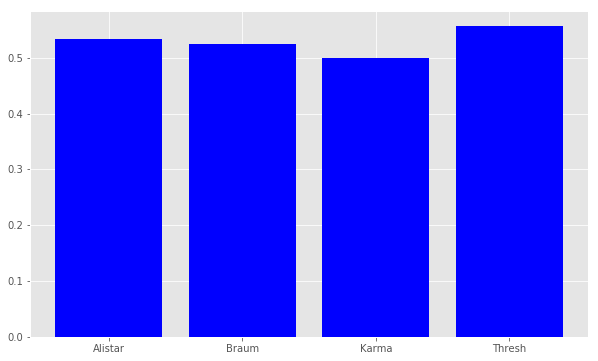

In [47]:
label = ['Braum','Thresh','Alistar','Karma']
bSupportWinRate = [0.524772, 0.556551, 0.533524, 0.499192]
plt.bar(x=label, height=bSupportWinRate,color='b')
plt.show()

In [48]:
a = df[['gamelength']]
b = df[['bResult']]
model_a = linear_model.LinearRegression()
result_a = model_a.fit(a,b)
print(result_a.intercept_,result_a.coef_)

[ 0.66323445] [[-0.00320816]]


A. Relationship between quality and alcohol: quality =0.66323445  -0.00320816 * gamelength + e

In [49]:
model_a = sm.OLS(b,a)
result_a = model_a.fit()
result_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bResult   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7352.
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:46:34   Log-Likelihood:                -5347.0
No. Observations:                7053   AIC:                         1.070e+04
Df Residuals:                    7052   BIC:                         1.070e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gamelength     0.0140      0.000     85.742      0.000       0.014       0.014
==============================================================================
Omnibus:                       34.954   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.516
Skew:                          -0.174   Prob(JB):                    2.00e-213
Kurtosis:                       1.208   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

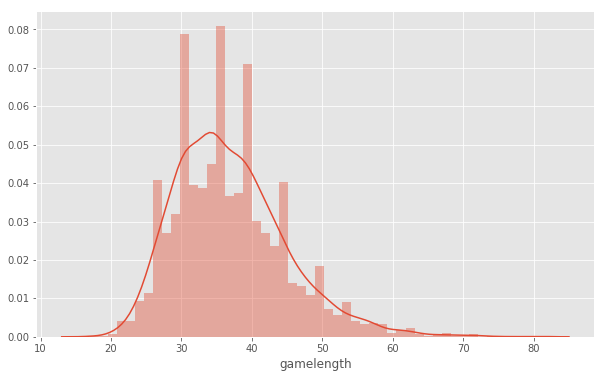

In [50]:
sns.distplot(df['gamelength'])
plt.show()

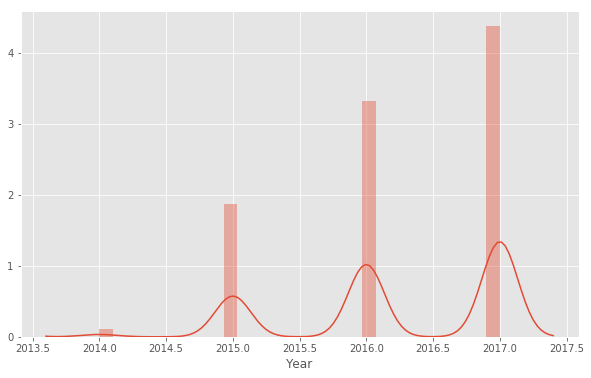

In [51]:
sns.distplot(df['Year'])
plt.show()

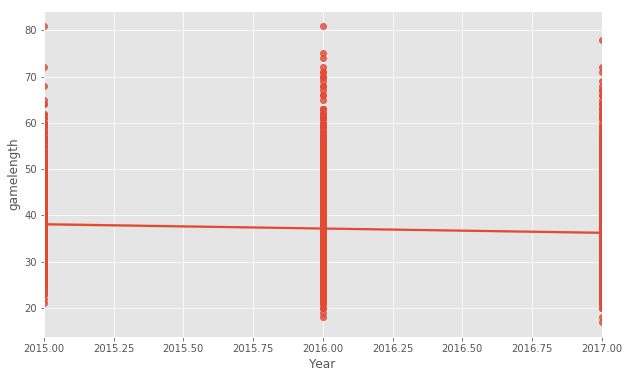

In [52]:
sns.regplot(x="Year", y="gamelength", data=df)
plt.xlim(2015,2017)
plt.show()

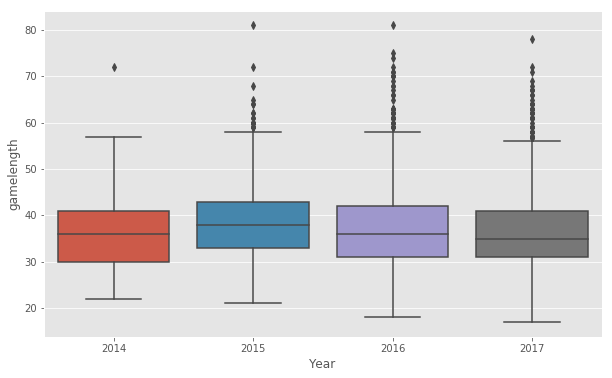

In [53]:
sns.boxplot(x='Year',y='gamelength',data=df)

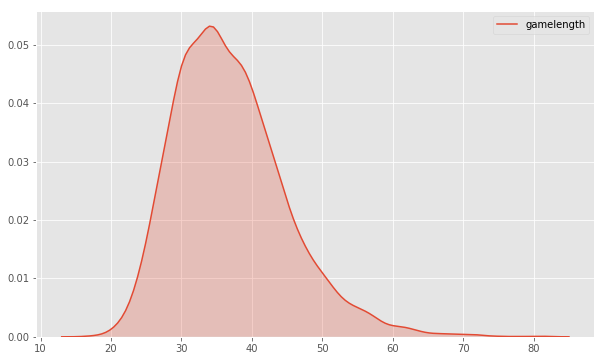

In [57]:
sns.kdeplot(df['gamelength'],shade=True)

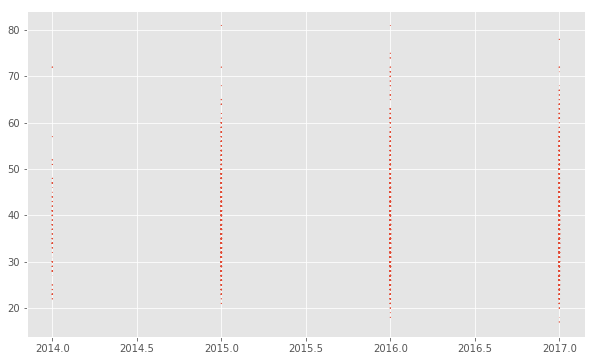

In [58]:
colour = np.random.rand(1000)
plt.scatter(df['Year'],df['gamelength'],colour)

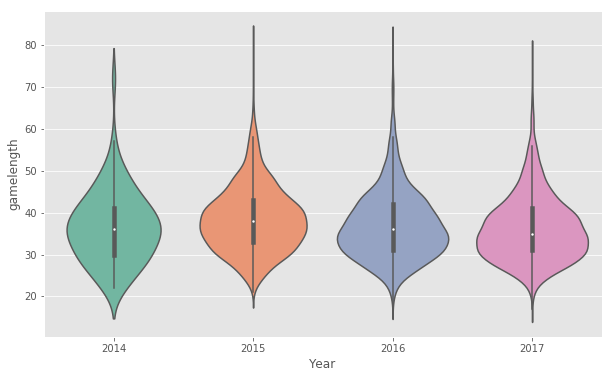

In [59]:
sns.violinplot(x='Year',y='gamelength',data=df,palette='Set2')